# Template Open Educational Resources
*Author1 $^1$, Author2 $^1$*<br>
*$^1$ Affiliation*<br>
*Contact: your.mail@provider.org*

Describe the assignment in a brief introduction. If required feel free to use images or equations to make the assignment clear. Add the estimated duration for completing the assignment below. This assumes that the background and math was introduced by the lecturer before starting the assignment. Also give at least one reference which provides a more comprehensive background of the assignment. A lecturer should be able to understand the assignment after going through the references. Please provide a minimum set of references just enough to achieve this. The dependencies should list all packages that must be installed to run the notebook. If specific versions of packages are required, this should be noted as in the example below.

**Duration:** XX Minutes

**References**<br>
[1] First reference<br>
[2] Second reference

**Dependencies**<br>
`pip install pyfar>=0.7 nbgrader watermark`

### Delete this block after reading

The following code block contains the import statements. Import only packages that are needed and follow common abbreviations, e.g., `import pyfar as pf` where ever possible.

Make sure that all plots are displayed as intended. If using *Matplotlib* for plotting add the inline magic `$matplotlib inline` if plots in the notebook are static or `%matplotlib ipympl`for interactive plots that for example allow zooming into the axes.

In [ ]:
import pyfar as pf
import numpy as np
%matplotlib inline

## Structure of the Assignment

If possible, divide your assignment into multiple smaller tasks. This will help students to successfully complete the assignments. It is also good to give them hints for checking their results, for example, by printing or plotting (intermediate) results. If possible provide hints for how the result should look like. Some assignments may be automatically checked. See blow for more information.

## Code styling

We do not enforce strict rules for code style but welcome a few things (also see examples below)

- Use verbose parameter names if possible, e.g., `room_volume` should be preferred over `V`
- Limit the length of the code and comments to roughly 79 characters
- Use markdown cells (as this one) and comments in the code cells to explain the current task
- Code that must be edited / completed by the students should be clearly marked, e.g., using `None` or `#TODO`

In [ ]:
# Set the room volume in cubic meters and
# equivalent absorption area in square in square meters
room_volume = None
equivalent_absorption_area = None

# compute the Sabine reverberation time
reverberation_time_sabine = None

# TODO: Verify your result by printing the reverberation time

## Equations

Equations should be realized with LaTex-Code, either inline as $c = f\,\lambda$ or in a new line as

$$
c = f \, \lambda
$$

Note that labeling and referencing of equations is not supported by notebooks. If necessary, reference equations manually.

## Images

All images must be embedded in the notebook. This can for example be done using the code and instructions below

1. Read the image from disc, encode it as a base64 string, and save the string to a text file

In [ ]:
# %%
"""
Encode image to base64 string to include in notebook. Include with

"""
import base64

with open("image.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

with open("encoded_image.txt", "w") as text_file:
    text_file.write(encoded_string)

2. Paste the following line inside a markdown cell at the position where the image should be placed.

`<img src="data:image/png;base64,BASE64STRING_HERE" alt="alt_text" width="30%">`

3. Copy and pase the base64 string into the line above.

## Handling of files

Files which cannot be embedded in the notebook or are too large can be downloaded via Pooch.
Pooch automatically downloads the requested files and takes care of path handling. This way files do not need to be part of the repository and can be easily accessed if the notebook is downloaded or transferred without including the respective data files forwarding.
Pooch allows files be stored in a user specified location or inside the default caching directory of the operating system.

For the documentation of Pooch, please refer to its [documentation](https://www.fatiando.org/pooch/latest/).

The following example create a database containing two files:

In [ ]:
import pooch

url = "https://pyfar.org/wp-content/uploads/pyfar_files"

fnames = [
    "castanets.wav",
    "castanets_license.txt"
]

checksums = [
    "59b6dcd553080bf12c667241036ce09f9b5a7942c034ae2f87f049743a21b16f",
    "9f910948054f85ecb4403ee668702fa3efac0813b5b8bdbe7678c186cb481412",
]

odie = pooch.create(
    # Use the default cache folder for the operating system
    path=pooch.os_cache("oer"),
    base_url=url,
    # The registry specifies the files that can be fetched
    registry=dict(zip(fnames, checksums)),
)

The files can then be downloaded on demand using the `fetch` command which conveniently returns the full path to the downloaded file.

In [ ]:
audio_data = pf.io.read_audio(odie.fetch(fnames[0]))

print(f"File has been downloaded to {odie.fetch(fnames[0])}")

with open(odie.fetch(fnames[1])) as f:
    print(f.read())

pf.plot.time(audio_data)

## Automatic Grading

We recomment `nbgrader` for automatic formatting and grading of Python tasks.

It provides functionality for automatic grading and a user interface in jupyter lab for manual grading. Feedback is automatically compiled into a nice looking html file (see below). `nbgrader` must at least be used remove the solution from the notebook to automatically generate the publicly available assignment notebook.

A few helpful links:
- [nbgrader Documentation](https://nbgrader.readthedocs.io/en/stable/)
- [Youtube Tutorial for authoring tasks](https://www.youtube.com/watch?v=QoAsVvpDlXg)

### Teacher's version:

Write a function `rms(x)` that takes a `pf.Signal` object as input and calculates the RMS energy channel-wise.

Use the functions `np.sqrt()` and `np.mean(..., axis=...)` (or `np.sum()`). **Do not** use for-loops for channel-wise calculations—use the `axis` parameter instead. **Do not** use the function `pf.dsp.rms()`.

In [ ]:
def rms(x: pf.Signal) -> np.array:
    # Write time data into numpy array:
    ### BEGIN SOLUTION
    x = x.time
    ### END SOLUTION

    # Calculate and return channel-wise rms energy x_rms:
    ### BEGIN SOLUTION
    return np.sqrt(np.mean(x**2, axis=-1))
    ### END SOLUTION


### Automatically generated student version:

Solutions are automatically replaced by a stub.

In [ ]:
def rms(x: pf.Signal) -> np.array:
    # Write time data into numpy array:
    # =========== Your solution here ============
    raise NotImplementedError()
    # ===========================================

    # Calculate and return channel-wise rms energy x_rms:
    # =========== Your solution here ============
    raise NotImplementedError()
    # ===========================================

### Automatically graded tests:

Points can be automatically awarded with `assert` statenents. Points for a cell are awarded if the cell executes without 
errors.

In [ ]:
### BEGIN TESTS
# Check result for single channel signal
x_test = pf.signals.sine(frequency=1, amplitude=0.123, n_samples=441)
assert np.isclose(rms(x_test), 0.0044526, atol=1e-6), \
    f'Expected 0.0044526, but got {rms(x_test)}'

# Check result for multichannel signals
amplitudes = np.arange(4)
x_test = pf.signals.sine(frequency=1, amplitude=amplitudes, n_samples=441)
assert np.allclose(rms(x_test), [0., 0.0362, 0.0724, 0.1086]), \
    f'rms() does not handle multichannel signals correctly.'

amplitudes = np.arange(4).reshape(2, -1)
x_test = pf.signals.sine(frequency=1, amplitude=amplitudes, n_samples=441)
assert rms(x_test).shape == amplitudes.shape, \
    f'rms() does not retain the shape of the input signal.'

### END TESTS

Tests can also be hidden from the students. 
Additional to `assert` statements, all types of tests that generate errors can be used for automatic grading, including checking for `for`-loops or forbidden function calls.

In [ ]:
### BEGIN HIDDEN TESTS
# check for forbidden function calls and loops
import ast, inspect
from unittest.mock import patch

def check_for_loop(func):
    source = inspect.getsource(func)
    tree = ast.parse(source)
    for node in ast.walk(tree):
        if isinstance(node, ast.For):
            raise RuntimeError(f'{func.__name__} contains a for loop.')

check_for_loop(rms)

with patch("pyfar.dsp.rms",
           side_effect=RuntimeError("Using pf.dsp.rms is forbidden!")):
    rms(x_test)

### END HIDDEN TESTS

### Feedback

`nbgrader` provides automatic compilation of feedback documents, including the number of points as well as written feedback:

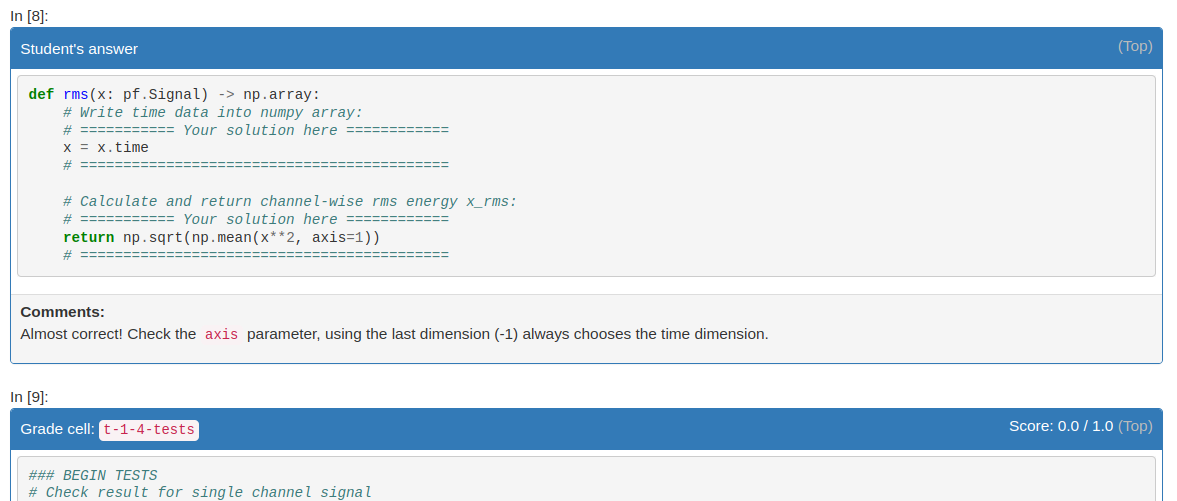


# License notice

This notebook © **YEAR** by **YOUR NAME HERE** is licensed under [CC BY 4.0](http://creativecommons.org/licenses/by/4.0/?ref=chooser-v1)

# Watermark

The following watermark might help others to install specific package versions that might be required to run the notebook. Please give at least the versions of Python, IPython, numpy , and scipy, major third party packagers (e.g., pytorch), and all used pyfar packages.

In [ ]:
%load_ext watermark
%watermark -v -m -p numpy,scipy,pyfar,sofar,nbgrader,watermark